## Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [26]:
pwd

'/home/andreza/code/andrezaumbelino/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression'

In [27]:
nba = pd.read_csv('/home/andreza/code/andrezaumbelino/05-ML/Data/NBA.csv')
nba.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [28]:
nba.shape

(4000, 6)

In [29]:
nba.corr()

,season,poss,mp,do_ratio,pacing,win_rating
season,1.000000,-0.151459,-0.115696,0.010404,-0.081842,-0.042861
poss,-0.151459,1.000000,0.995324,0.587754,-0.301149,0.742017
mp,-0.115696,0.995324,1.000000,0.590354,-0.303684,0.748268
do_ratio,0.010404,0.587754,0.590354,1.000000,-0.169967,0.666120
pacing,-0.081842,-0.301149,-0.303684,-0.169967,1.000000,-0.202611
win_rating,-0.042861,0.742017,0.748268,0.666120,-0.202611,1.000000


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [30]:
model = LinearRegression()

In [31]:
X = nba[['mp']]
y = nba['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

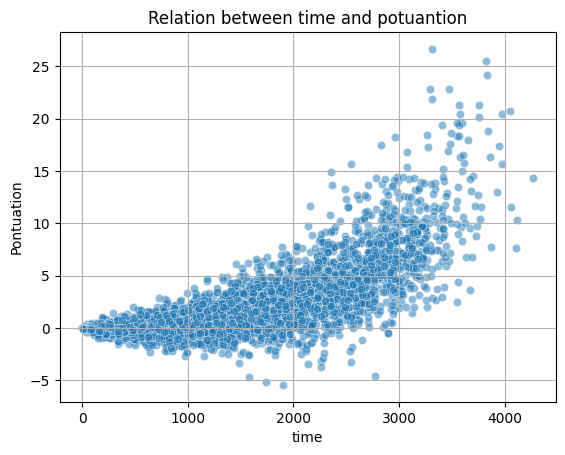

In [32]:
sns.scatterplot(data=nba, x='mp', y='win_rating', alpha=0.5)


# Labels
plt.xlabel("time")
plt.ylabel("Pontuation")
plt.title("Relation between time and potuantion")
plt.grid(True)
plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [33]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cv_results =  cross_validate(model, X_train, y_train, cv=5)
cv_results


{'fit_time': array([0.00213242, 0.00258851, 0.00176048, 0.00166035, 0.00176668]),
 'score_time': array([0.00196362, 0.0027132 , 0.00169444, 0.00131631, 0.0011766 ]),
 'test_score': array([0.59003091, 0.52724749, 0.60671475, 0.5224595 , 0.58869747])}

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [34]:
min_score = cv_results['test_score'].min()
min_score

0.5224595007080586

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [35]:
max_score = cv_results['test_score'].max()
max_score

0.6067147531512469

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [36]:
mean_score = cv_results['test_score'].mean()

In [37]:
cv_results['score_time'].sum()

0.008864164352416992

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [39]:
train_sizes = range(2,21)

In [40]:
K = range(2,21)
total_time = []
mean_score = []

for k in K:
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    cv_results =  cross_validate(model, X_train, y_train, cv=k)
    sum_time = cv_results['score_time'].sum()
    total_time.append(sum_time)
    score_mean = cv_results['test_score'].mean()
    mean_score.append(score_mean)


In [42]:
ks = np.arange(100,3300,100)
scores_mean = []

for k in ks:
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    cv_results = cross_validate(model, X_train, y_train, cv=k)
    score_mean = cv_results['test_score'].mean()
    scores_mean.append(score_mean)


KeyboardInterrupt: 

In [ ]:
total_time

In [ ]:
mean_score

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [ ]:
model = model.fit(X, y)
model

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [ ]:
slope1 = model.coef_
slope1[0]

0.002602579938640193

In [ ]:
slope = round(slope1[0],3)
slope

0.003

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [ ]:
intercept = model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())

## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [ ]:
new_data = pd.DataFrame([[1000]], columns=['mp'])
prediction = model.predict(new_data)

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())

## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

In [ ]:
X = nba[['pacing']]
y = nba['win_rating']

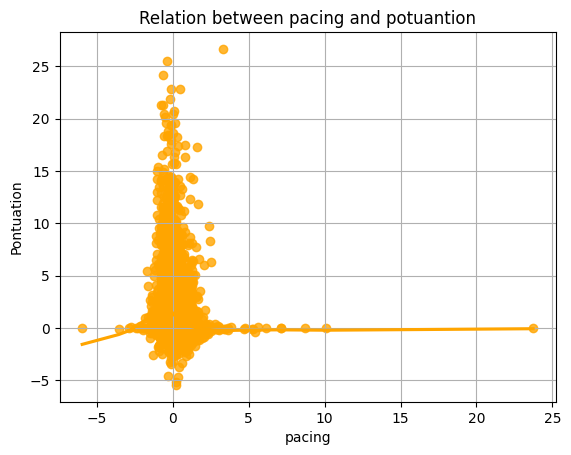

In [ ]:
sns.regplot(data=nba, x="pacing", y="win_rating", lowess=True, color= 'orange')


# Labels
plt.xlabel("pacing")
plt.ylabel("Pontuation")
plt.title("Relation between pacing and potuantion")
plt.grid(True)
plt.show()


<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [ ]:
X2 = nba[['poss', 'mp','do_ratio']]
y2 = nba['win_rating']

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
model2.fit(X2, y2)

LinearRegression()

In [ ]:
model2.coef_

array([-0.00051728,  0.00293711,  0.39823499])

In [ ]:
model2.intercept_

-0.10106964519489292

In [ ]:
model2 = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
cv_results2 = cross_validate(model2, X_train2, y_train2, cv=10)
mean_2_feat_score = cv_results2['test_score'].mean()

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁